# Midterm Project : M.A.F.I.A. in the morning(Final)
* * *

## 4. 경찰은 마피아를 찾고, 메딕은 시민을 살립니다.
* 경찰도 메딕도 있는 게임을 생각해 봅시다.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import random 

In [2]:
def job_Init(num, job, list):
    for i in range(0, num):
        list.append(job)

def people_Count(list):
    mafia=list.count("mafia")
    citizen=list.count("citizen")
    participant = mafia+citizen
    return mafia, citizen, participant

def modefinder(numbers): 
    c = Counter(numbers) 
    mode = c.most_common(1) 
    return mode[0][0]

In [3]:
def day_Vote(participants):
    vote_list=list()
    for i in range(0, len(participants)):
        if participants[i]=="mafia":
            vote=random.randrange(participants.index("citizen"), len(participants))
            vote_list.append(vote)
        else:
            vote=random.randrange(0, len(participants))
            vote_list.append(vote)
    max_vote=modefinder(vote_list)
    del participants[max_vote]
    return participants

In [4]:
def night_Kill(participants):
    vote_list=list()
    for i in range(0, participants.index("citizen")):
        if participants[i]=="mafia":
            vote=random.randrange(participants.index("citizen"), len(participants))
            vote_list.append(vote)
    max_vote=modefinder(vote_list)
    del participants[max_vote]
    return participants

In [5]:
def in_Game(participants):
    turn = "morning"
    mafia, citizen, people = people_Count(participants)
    while (mafia > 0) & (people-mafia > mafia) == True:
        if turn == "morning":
            participants = day_Vote(participants)
            turn = "night"
        else:
            participants = night_Kill(participants)
            turn = "morning"
        mafia, citizen, people = people_Count(participants)
    #print(participants)
    if mafia == 0:
        return True
    else:
        return False

In [6]:
def citizen_win_Rate(participants):
    wincount = 0
    mafia=participants.count("mafia")
    citizen=participants.count("citizen")
    times=100
    for i in range(0,times):
        participants=list()
        job_Init(mafia, "mafia", participants)
        job_Init(citizen, "citizen", participants)
        if in_Game(participants) == True:
            wincount += 1
    return 100*wincount/times

In [7]:
def Mafia_Game_Basic(num_mafia, num_citizen):
    mafia = num_mafia
    citizen = num_citizen
    citizen_win_list=list()
    while mafia < citizen:
        mafia += 1
        citizen -= 1
        Game_participants=list()
        job_Init(mafia, "mafia", Game_participants)
        job_Init(citizen, "citizen", Game_participants)
        rate=citizen_win_Rate(Game_participants)
        citizen_win_list.append(rate)
    return citizen_win_list

In [8]:
Game_participants=list()
col=["Citizens to Win(%)"]
Game = Mafia_Game_Basic(0, 100)
length=len(Game)
index = list()
for i in range(1, length+1):
    index.append(i)

df=pd.DataFrame(Game, index, columns=col)
df

,Citizens to Win(%)
1,62.0
2,38.0
3,34.0
4,14.0
5,7.0
6,7.0
7,1.0
8,0.0
9,0.0
10,0.0


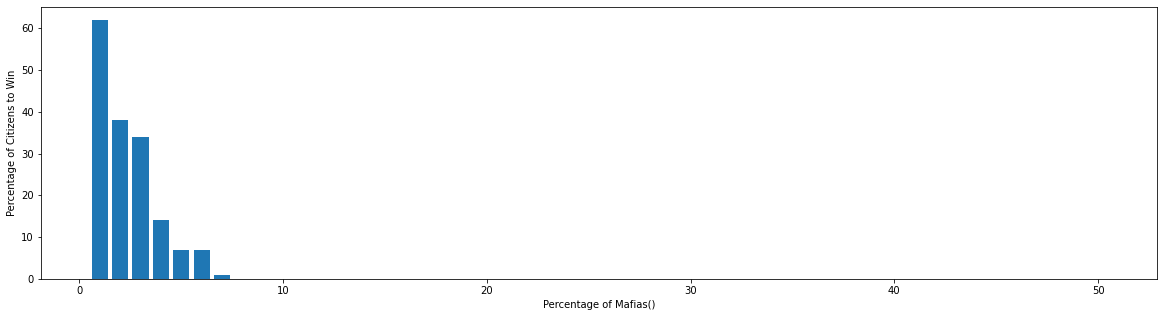

In [9]:
plt.figure(figsize=(20,5))
plt.bar(index, Game)
plt.xlabel(f"Percentage of Mafias()")
plt.ylabel("Percentage of Citizens to Win")
plt.show()
plt.close()

## 제출 방법
* Due Date: 2021년 11월 26일 23시 59분
* LMS (https://myclass.ssu.ac.kr)에 제출합니다.
    * 파일은 STAT2021_PR1_20212021_홍길동.zip 형태로 부탁드립니다
    * 이 형태가 아닌 경우 제대로 제출되지 않을 수 있습니다.
    * 보고서 PDF파일과 소스코드를 압축해서 한 파일로 만들어주세요 (HWP로 내시면 화낼거에요)
    * 제발 간절히 부탁합니다. egg 혹은 alz는 쓰지 말아주세요... (감점할거에요 -_-+)
    * 제대로 전송이 안되면 개별 파일을 따로 올리셔도 됩니다.
    * 구현체는 제대로 작동을 하면 어떤 형태도 좋습니다.
    * 점수의 차이는 주로 해 보신 실험과 보고서에서 있을 것입니다. 재밌는 실험 많이 해보세요. 굿럭!